# Problem Set 2 - James He

# AML

## Exercise 3.2

Take $d=2$ and create a data set $D$ of size $N = 1--$ that is not linearly separable. You can do so by first choosing a random line in the plane as your target function and the inputs $x_n$ of the data set as random points in the plane. Then, evaluate the target function on each $x_n$ to get the corresponding output $y_n$. FInally, flip the labels of $frac{N}{10}$ randomly selected $y_n$'s and the data set will likely become non-separable.

Now, run the pocket algorithm on your dat aset using $T = 1000$ iterations. Repeat the experiment 20 times. Then, plot the average $E_{in}(w(t))$ and the average $E_{in}(\^w)$ (which is also a function of $t$) on the same figure and see how they behave when $t$ increases. Similarly, use a test set of size 1000 and plot a figure to show how $E_{out}(w(t))$ and $E_{out}(\^w)$ behave with $t$.

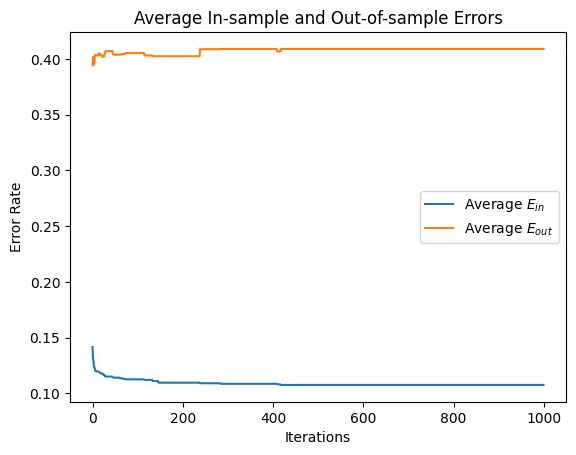

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data_fixed(N):
    """
    Generates a dataset of size N that is initially linearly separable, and returns the line parameters.
    """
    # Randomly generating a line
    x1, y1, x2, y2 = np.random.uniform(-1, 1, 4)
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1

    # Generating points and their labels
    X = np.random.uniform(-1, 1, (N, 2))
    Y = np.sign(X[:, 1] - (slope * X[:, 0] + intercept))

    return X, Y, (x1, y1, x2, y2)

def flip_labels(Y, fraction):
    """
    Flips the labels of a fraction of the dataset to make it non-separable.
    """
    N = len(Y)
    flip_indices = np.random.choice(N, int(N * fraction), replace=False)
    Y[flip_indices] = -Y[flip_indices]
    return Y

def calculate_error(X, Y, weights):
    """
    Calculates the error rate of the perceptron model on a given dataset.
    """
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Adding bias term
    predictions = np.sign(np.dot(X, weights))
    error = np.mean(predictions != Y)
    return error

def run_experiments(num_experiments, N_train, N_test, max_iterations):
    """
    Runs a number of experiments, each involving training on a dataset and testing on another.
    """
    e_in_avg = np.zeros(max_iterations)
    e_out_avg = np.zeros(max_iterations)

    for _ in range(num_experiments):
        # Training data
        X_train, Y_train, _ = generate_data_fixed(N_train)
        Y_train = flip_labels(Y_train, 0.1)
        
        # Test data
        X_test, Y_test, _ = generate_data_fixed(N_test)
        Y_test = flip_labels(Y_test, 0.1)

        # Running the pocket algorithm
        weights = np.zeros(X_train.shape[1] + 1)  # Initial weights
        pocket_weights = np.copy(weights)
        pocket_error = np.inf

        for t in range(max_iterations):
            # Perceptron update
            X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
            for index in np.random.permutation(len(X_train)):
                if Y_train[index] * np.dot(X_train_bias[index], weights) <= 0:
                    weights += Y_train[index] * X_train_bias[index]
                    # Check for pocket update
                    current_error = calculate_error(X_train, Y_train, weights)
                    if current_error < pocket_error:
                        pocket_error = current_error
                        pocket_weights = np.copy(weights)

            # Calculate errors for this iteration
            e_in_avg[t] += calculate_error(X_train, Y_train, pocket_weights)
            e_out_avg[t] += calculate_error(X_test, Y_test, pocket_weights)

    # Averaging over all experiments
    e_in_avg /= num_experiments
    e_out_avg /= num_experiments

    return e_in_avg, e_out_avg

# Parameters
num_experiments = 20
N_train = 100
N_test = 1000
max_iterations = 1000

# Run experiments and calculate average errors
e_in_avg, e_out_avg = run_experiments(num_experiments, N_train, N_test, max_iterations)

# Plotting the results
iterations = range(max_iterations)
plt.plot(iterations, e_in_avg, label='Average $E_{in}$')
plt.plot(iterations, e_out_avg, label='Average $E_{out}$')
plt.xlabel('Iterations')
plt.ylabel('Error Rate')
plt.title('Average In-sample and Out-of-sample Errors')
plt.legend()
plt.show()


## Exercise 4.3

Deterministic noise depends on $H$, as some models approximate $f$ better than others.

(a) Assume $$ is fixed and we increase the complexity of $f$. Will deter­ ministic noise in general go up or down? Is there a higher or lower tendency to overfit?

(b)Assume $f$ is fixed and we decrease the complexity of $H$. Will deter­ ministic noise in general go up or down? Is there a higher or lower tendency to overfit? [Hint: There is a race between two factors that affect overfitting in opposite ways, but one wins.]

### Solution:

(a)
- Assumption: Complexity of \( f \) is increased, \( H \) is fixed.
- Deterministic Noise: Likely to increase. As \( f \) becomes more complex, the models in \( H \) might not be able to capture this complexity adequately, leading to higher deterministic noise.
- Tendency to Overfit: Lower tendency to overfit. Since \( H \) remains fixed and less complex than \( f \), the models in \( H \) might not be sophisticated enough to overfit the more complex true function \( f \).

(b)
- Assumption: \( f \) is fixed, complexity of \( H \) is decreased.
- Deterministic Noise: Likely to increase. Simplifying \( H \) means the models may not capture the fixed complexity of \( f \) well, resulting in higher deterministic noise.
- Tendency to Overfit: Lower tendency to overfit, veering towards underfitting. As \( H \) becomes less complex, it's less likely to overfit; however, the models might become too simplistic to capture the true trends in \( f \), leading to underfitting.

## Exercise 4.9

Referring to Figure 4.10, why are both curves increasing with K? Why do they converge to each other with increasing K?

### Solution:

Typically, as the size of the validation set increases, the validation error \( E_{val} \) provides a better estimate of the out-of-sample error \( E_{out} \), and thus the two curves would converge. This is because a larger validation set tends to be more representative of the unknown out-of-sample data, reducing the variance in the error estimate.


# PRML

## Exercise 1.2

Write down the set of coupled linear equations, analogous to (1.122), satisfied by the coefficients $w_i$ which minimize the regularized sum-of-squares error function given by (1.4).

(1.4) $$\tilde{E} = \frac{1}{2}\sum_{n=1}^N{[y(x_n, \textbf{w}) - t_n]^2} + \frac{\lambda}{2}||w||^2$$

### Solution:

Derivative of $ \tilde{E} $ with respect to $ w_i $:

$$ \frac{\partial \tilde{E}}{\partial w_i} = \frac{\partial}{\partial w_i}\left(\frac{1}{2}\sum_{n=1}^N{\left[y(x_n, \mathbf{w}) - t_n\right]^2}\right) + \frac{\partial}{\partial w_i}\left(\frac{\lambda}{2}||\mathbf{w}||^2\right) $$

Derivative of the first term:

$$ \frac{\partial}{\partial w_i}\left(\frac{1}{2}\sum_{n=1}^N{\left[y(x_n, \mathbf{w}) - t_n\right]^2}\right) = \sum_{n=1}^N{\left[y(x_n, \mathbf{w}) - t_n\right] \cdot \frac{\partial y(x_n, \mathbf{w})}{\partial w_i}} $$

 Derivative of the regularization term:

$$ \frac{\partial}{\partial w_i}\left(\frac{\lambda}{2}||\mathbf{w}||^2\right) = \lambda w_i $$

Setting the derivative to zero for minimization:

$$ \sum_{n=1}^N{\left[y(x_n, \mathbf{w}) - t_n\right] \cdot \frac{\partial y(x_n, \mathbf{w})}{\partial w_i}} + \lambda w_i = 0 $$

This equation needs to be satisfied for each $ w_i $ in the model. The specific form of $ \frac{\partial y(x_n, \mathbf{w})}{\partial w_i} $ depends on the model for $ y(x_n, \mathbf{w}) $. For a linear model, where $ y(x_n, \mathbf{w}) = \sum_{j} w_j x_{nj} $, this derivative becomes $ x_{ni} $ (the $ i $-th feature of $ x_n $).

Therefore, for each $ w_i $, the equation is:

$$ \sum_{n=1}^N{\left[y(x_n, \mathbf{w}) - t_n\right] \cdot x_{ni}} + \lambda w_i = 0 $$

## Exercise 1.3

Suppose that we have three coloured boxes $r$ (red), $b$ (blue), and $g$ (green). Box $r$ contains 3 apples, 4 oranges, and 3 limes, box $b$ contains 1 apple, 1 orange, and 0 limes, and box $g$ contains 3 apples, 3 oranges, and 4 limes. If a box is chosen at random with probabilities $p(r) = 0.2$, $p(b) = 0.2$, $p(g) = 0.6$, and a piece of fruit is removed from the box (with equal probability of selecting any of the items in the box), then what is the probability of selecting an apple? If we observe that the selected fruit is in fact an orange, what is the probability that it came from the green box?

### Solution:

Probability of Selecting an Apple

Given probabilities for choosing each box:
- $ p(r) = 0.2 $
- $ p(b) = 0.2 $
- $ p(g) = 0.6 $

Contents of each box:
- Red box $ r $: 3 apples, 4 oranges, 3 limes (total 10 fruits).
- Blue box $ b $: 1 apple, 1 orange, 0 limes (total 2 fruits).
- Green box $ g $: 3 apples, 3 oranges, 4 limes (total 10 fruits).

Calculating probability of selecting an apple, $ P(A) $:
$$ P(A) = P(A|r)P(r) + P(A|b)P(b) + P(A|g)P(g) $$
$$ P(A) = \left(\frac{3}{10} \cdot 0.2\right) + \left(\frac{1}{2} \cdot 0.2\right) + \left(\frac{3}{10} \cdot 0.6\right) $$
$$ P(A) = 0.06 + 0.1 + 0.18 $$
$$ P(A) = 0.34 $$

Probability that an Orange Came from the Green Box

Given that the selected fruit is an orange, calculate $ P(G|O) $.

Calculating $ P(O) $, the probability of selecting an orange:
$$ P(O) = P(O|r)P(r) + P(O|b)P(b) + P(O|g)P(g) $$
$$ P(O) = \left(\frac{4}{10} \cdot 0.2\right) + \left(\frac{1}{2} \cdot 0.2\right) + \left(\frac{3}{10} \cdot 0.6\right) $$
$$ P(O) = 0.08 + 0.1 + 0.18 $$
$$ P(O) = 0.36 $$

Find $ P(G|O) $:
$$ P(G|O) = \frac{P(O|G)P(G)}{P(O)} $$
$$ P(G|O) = \frac{\left(\frac{3}{10}\right) \cdot 0.6}{0.36} $$
$$ P(G|O) = \frac{0.18}{0.36} $$
$$ P(G|O) = 0.5 $$

Thus, the probability of selecting an apple is $ 0.34 $ and the probability that an orange came from the green box, given that an orange was selected, is $ 0.5 $.

## Exercise 2.12

The uniform distribution for a continuous variable x is defined by

(2.278) $$U(x|a,b) = \frac{1}{b-a}, a\le x\le b$$

Verify that this distribution is normalized, and find expressions for its mean and variance.

### Solution:

To verify that the uniform distribution $U(x|a,b)$ is normalized, we need to show that its integral over the entire range of possible values is equal to 1.

The probability density function (PDF) of the uniform distribution $U(x|a,b)$ is given by:

$$
U(x|a,b) = \frac{1}{b-a}, \quad a \leq x \leq b
$$

To check for normalization, we need to integrate this PDF over the entire range $[a, b]$:

$$
\int_{a}^{b} U(x|a,b) dx
$$

Integrating the PDF from $a$ to $b$ gives:

$$
\int_{a}^{b} \frac{1}{b-a} dx = \frac{1}{b-a} \left[x\right]_{a}^{b} = \frac{1}{b-a}(b - a) = 1
$$

So, the integral of the uniform distribution $U(x|a,b)$ over its entire range is equal to 1, which confirms that it is a normalized probability distribution.

Mean (Expectation):

The mean ($\mu$) of the uniform distribution is given by the average of the minimum ($a$) and maximum ($b$) values of the distribution:

$$
\mu = \frac{a + b}{2}
$$

Variance:

The variance ($\sigma^2$) of the uniform distribution is calculated as:

$$
\sigma^2 = \frac{(b - a)^2}{12}
$$

So, for the uniform distribution $U(x|a,b)$:

- Mean ($\mu$) = $\frac{a + b}{2}$
- Variance ($\sigma^2$) = $\frac{(b - a)^2}{12}$

These expressions represent the mean and variance of the given uniform distribution.

## Exercise 3.4

Consider a linear model of the form

(3.105) $$y(x,\textbf{w}) = w_0 + \sum_{i=1}^{D}w_ix_i$$

together with a sum-of-squares error function of the form

(3.106) $$E_d(w) = \frac{1}{2}\sum_{n=1}^{N}\{y(x_n,\textbf{w}) - t_n\}^2$$

Now suppose that Gaussian noise $\epsilon_i$ with zero mean and variance $\sigma^2$ is added in- dependently to each of the input variables $x_i$. By making use of $E[\epsilon _i] = 0$ and $E[\epsilon_i,\epsilon_j] = \delta_{ij}\sigma^2$, show that minimizing $E_D$ averaged over the noise distribution is equivalent to minimizing the sum-of-squares error for noise-free input variables with the addition of a weight-decay regularization term, in which the bias parameter $w_0$ is omitted from the regularizer.

### Solution:

To show that minimizing $E_D$ averaged over the noise distribution is equivalent to minimizing the sum-of-squares error for noise-free input variables with the addition of a weight-decay regularization term, we need to calculate the expected value of $E_D(w)$ over the noise distribution and show that it is equivalent to the regularized sum-of-squares error. We'll compute $E[E_D(w)]$ and compare it to the regularized error term.

$$E_D(w) = \frac{1}{2} \sum_{n=1}^N \left\{ w_0 + \sum_{i=1}^D w_i (x_{ni} + \epsilon_i) - t_n \right\}^2$$

$$E[E_D(w)] = E\left[\frac{1}{2} \sum_{n=1}^N \left\{ w_0 + \sum_{i=1}^D w_i (x_{ni} + \epsilon_i) - t_n \right\}^2\right]$$

$$E[E_D(w)] = \frac{1}{2} \sum_{n=1}^N E\left[\left\{ w_0 + \sum_{i=1}^D w_i (x_{ni} + \epsilon_i) - t_n \right\}^2\right]$$

$$E[E_D(w)] = \frac{1}{2} \sum_{n=1}^N E\left[w_0^2 + 2w_0\sum_{i=1}^D w_i (x_{ni} + \epsilon_i) - 2w_0t_n + \left(\sum_{i=1}^D w_i (x_{ni} + \epsilon_i)\right)^2 - 2t_n\sum_{i=1}^D w_i (x_{ni} + \epsilon_i) + t_n^2\right]$$

Calculate the expectations of each term:

1. $E[w_0^2]$ and $E[w_0]$ are constants, and their expectations will not depend on the noise variables $\epsilon_i$.
2. $E[2w_0t_n]$ is also a constant term and doesn't depend on the noise.
3. $E[\epsilon_i]$ is zero, so terms involving $\epsilon_i$ will vanish.
4. $E[\epsilon_i^2]$ is equal to $\sigma^2$ because of the given variance $\sigma^2$ of the noise.

We can simplify the expression:

$$E[E_D(w)] = \frac{1}{2} \sum_{n=1}^N \left[w_0^2 + 2w_0\sum_{i=1}^D w_i x_{ni} - 2w_0t_n + \left(\sum_{i=1}^D w_i x_{ni}\right)^2 - 2t_n\sum_{i=1}^D w_i x_{ni} + t_n^2\right] + \frac{1}{2} \sum_{n=1}^N 2D\sigma^2$$

Now, we can see that the first term inside the summation is the regular sum-of-squares error $E_D(w)$, and the second term is a constant term related to the noise:

$$E[E_D(w)] = \frac{1}{2} \sum_{n=1}^N E_D(w) + \frac{1}{2} \sum_{n=1}^N 2D\sigma^2$$

So, minimizing $E[E_D(w)]$ is equivalent to minimizing the sum-of-squares error $E_D(w)$ plus a regularization term $\frac{1}{2} \sum_{n=1}^N 2D\sigma^2$. The regularization term doesn't involve the bias parameter $w_0$, so it's equivalent to weight-decay regularization with the omission of $w_0$ in the regularizer.

## Exercise 3.11

We have seen that, as the size of a data set increases, the uncertainty associated with the posterior distribution over model parameters decreases. Make use of the matrix identity (Appendix C)

(3.110) $$(M+vv^T)^{-1} = M^{-1} - \frac{(M^{-1}v)(v^TM^{-1})}{1+v^TM^{-1}v}$$

to show that the uncertainty $\sigma^2_N(X)$ associated with the linear regression function given by (3.59) satisfies

(3.111) $$\sigma^2_{N+1}(x) <= \sigma^2_N(x)$$

(3.59) $$\sigma^2_N(x) = \frac{1}{\beta} + \emptyset ^T \textbf{S}_N\emptyset(x)$$


### Solution:
1. Applying the Matrix Identity:
   $$ \mathbf{S}_{N+1} = \left(\mathbf{S}_N^{-1} + \frac{1}{\sigma^2} \phi(x_{N+1}) \phi(x_{N+1})^T\right)^{-1} $$
   Using the matrix identity:
   $$ \mathbf{S}_{N+1} = \mathbf{S}_N - \frac{(\mathbf{S}_N \phi(x_{N+1}))(\phi(x_{N+1})^T \mathbf{S}_N)}{1 + \frac{1}{\sigma^2} \phi(x_{N+1})^T \mathbf{S}_N \phi(x_{N+1})} $$

2. Uncertainty with $ N+1 $ Data Points:
   $$ \sigma^2_{N+1}(x) = \frac{1}{\beta} + \phi(x)^T \mathbf{S}_{N+1} \phi(x) $$
   $$ = \frac{1}{\beta} + \phi(x)^T \left(\mathbf{S}_N - \frac{(\mathbf{S}_N \phi(x_{N+1}))(\phi(x_{N+1})^T \mathbf{S}_N)}{1 + \frac{1}{\sigma^2} \phi(x_{N+1})^T \mathbf{S}_N \phi(x_{N+1})}\right) \phi(x) $$

3. Compare $ \sigma^2_{N+1}(x) $ and $ \sigma^2_N(x) $:
   Since the subtractive term in the expression for $ \sigma^2_{N+1}(x) $ is positive (a quadratic form), it follows that:
   $$ \sigma^2_{N+1}(x) \leq \sigma^2_N(x) $$

This shows that the uncertainty $ \sigma^2_{N+1}(x) $ in the linear regression function after observing $ N+1 $ data points is less than or equal to the uncertainty $ \sigma^2_N(x) $ after observing $ N $ data points.